**ABC Limited (ABC) is a private company producing lunch packages. It mainly sells products to supermarkets and grocery stores. ABC has a loan from a local bank, which is secured by its accounts receivable and inventory. The loan is not to exceed 70% of accounts receivable and 40% of inventory as at the accounting year end (December 31, 2016). ABC uses perpetual inventory system. ABC must provide the bank with the reviewed financial statements within 60 days of its year end.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\rigan\OneDrive\Рабочий стол\EDA\train.csv")
data = pd.DataFrame(df)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data_means_Category_2 = data['Product_Category_2'].mean()
data_means_Category_3 = data['Product_Category_3'].mean()


In [9]:
data = data.fillna(data_means_Category_2)
data = data.fillna(data_means_Category_3)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,9.842329,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,9.842329,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,9.842329,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,9.842329,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,9.842329,365


In [10]:
data.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
group_age = data.groupby(['Age', 'City_Category'])['City_Category'].count().unstack()
group_age

City_Category,A,B,C
Age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


<Axes: xlabel='Age'>

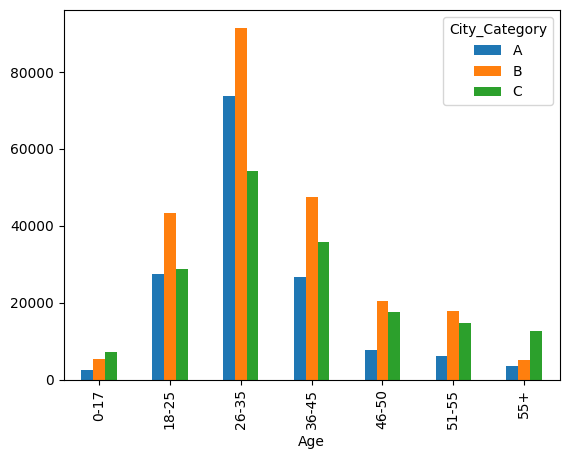

In [13]:
group_age.plot(kind='bar')

So we can see that there are people 26-35 years old in every city in large numbers

In [14]:
data_gender = data.groupby(['Age', 'Gender'])['Gender'].count().unstack()
data_gender

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


<Axes: xlabel='Age'>

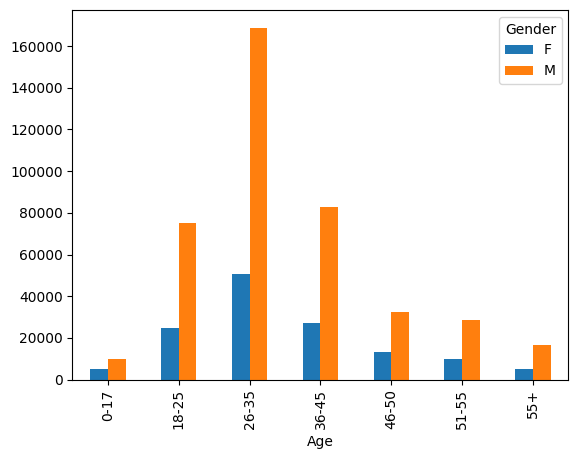

In [15]:
data_gender.plot(kind='bar')

A large number of buyers aged 26-35 are men

In [16]:
data_Occupation = data.groupby(['Age', 'Occupation'])['Occupation'].count().unstack()
data_Occupation

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,2134.0,387.0,144.0,NaN,113.0,NaN,NaN,139.0,29.0,NaN,...,18.0,237.0,15.0,93.0,NaN,NaN,35.0,NaN,807.0,NaN
18-25,9095.0,3820.0,4364.0,1860.0,48241.0,1450.0,1144.0,2078.0,14.0,559.0,...,717.0,4585.0,NaN,4388.0,906.0,1816.0,3944.0,1085.0,2500.0,5445.0
26-35,34204.0,19080.0,12617.0,8159.0,21829.0,6082.0,7216.0,24060.0,378.0,1489.0,...,5009.0,15279.0,NaN,13446.0,6874.0,7070.0,17064.0,2243.0,3468.0,13994.0
36-45,13393.0,9501.0,5183.0,4126.0,1747.0,3066.0,4822.0,18762.0,98.0,3096.0,...,2732.0,6848.0,427.0,5590.0,2585.0,7572.0,10252.0,1527.0,1008.0,7508.0
46-50,4488.0,7089.0,2124.0,1599.0,129.0,1187.0,2561.0,6664.0,549.0,528.0,...,1584.0,2491.0,631.0,1445.0,854.0,3032.0,4662.0,1124.0,261.0,2699.0
51-55,4602.0,4410.0,1344.0,1094.0,249.0,377.0,3952.0,5355.0,317.0,398.0,...,1383.0,1417.0,1785.0,1012.0,514.0,3918.0,2528.0,531.0,200.0,3115.0
55+,1722.0,3139.0,812.0,812.0,NaN,15.0,660.0,2075.0,161.0,221.0,...,143.0,322.0,4870.0,1335.0,432.0,1963.0,1558.0,112.0,217.0,801.0


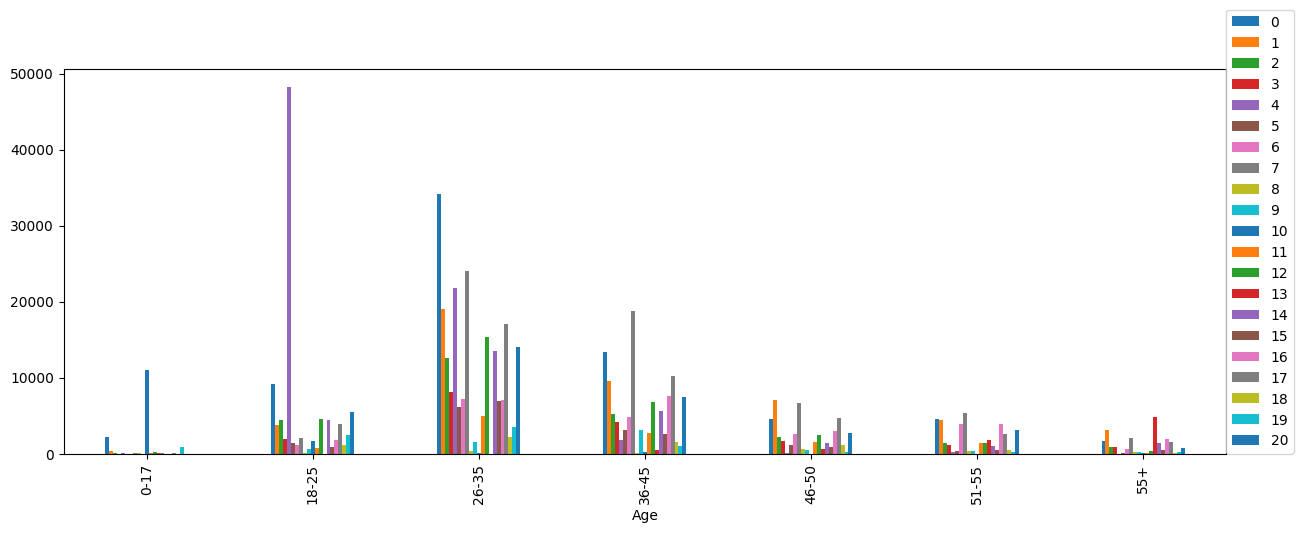

In [17]:
data_Occupation.plot(kind='bar', figsize=(15, 5))
plt.legend(loc=(1,0))

We found out that among all categories, people aged 18-25 work the most by profession 4

We got that men are more likely to shop in this store, let's sort them out and see where they work and their age

In [18]:
data_m = data[data['Gender'] == 'M']
data_m

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,9.842329,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,9.842329,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,9.842329,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,9.842329,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,9.842329,9.842329,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,9.842329,9.842329,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,9.842329,9.842329,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,9.842329,9.842329,473


In [19]:
data_m_group = data_m.groupby(['Age', 'Occupation'])['Occupation'].count().unstack()
data_m_group

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,1387.0,214.0,53.0,NaN,113.0,NaN,NaN,96.0,29.0,NaN,...,18.0,237.0,15.0,93.0,NaN,NaN,35.0,NaN,692.0,NaN
18-25,6848.0,2130.0,2356.0,1278.0,36078.0,1369.0,1027.0,1726.0,14.0,30.0,...,681.0,4212.0,NaN,3241.0,659.0,1577.0,3633.0,1085.0,1813.0,3715.0
26-35,26124.0,11678.0,10110.0,3995.0,17020.0,5297.0,4471.0,18906.0,378.0,66.0,...,4318.0,13842.0,NaN,9473.0,5405.0,6435.0,15324.0,2171.0,2876.0,10920.0
36-45,10153.0,6203.0,3527.0,2212.0,1168.0,2024.0,2895.0,16402.0,59.0,352.0,...,2214.0,5909.0,427.0,4624.0,2354.0,6010.0,9078.0,1527.0,385.0,5150.0
46-50,2571.0,3801.0,1117.0,1143.0,68.0,975.0,1210.0,5623.0,549.0,NaN,...,1533.0,2165.0,551.0,1124.0,513.0,2196.0,4014.0,1124.0,261.0,1964.0
51-55,3329.0,2910.0,607.0,694.0,25.0,277.0,2166.0,4528.0,37.0,NaN,...,1211.0,1223.0,1474.0,869.0,514.0,3461.0,2472.0,373.0,200.0,2237.0
55+,1114.0,2506.0,189.0,409.0,NaN,15.0,426.0,1824.0,119.0,NaN,...,111.0,122.0,3763.0,1122.0,330.0,1585.0,1558.0,112.0,217.0,765.0


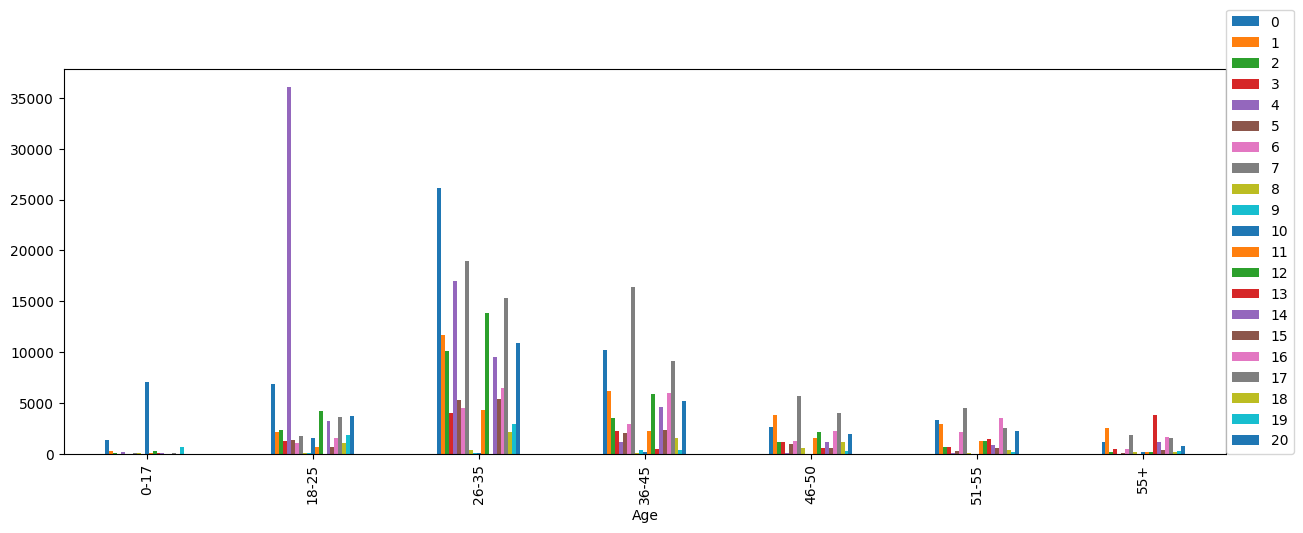

In [20]:
data_m_group.plot(kind='bar', figsize=(15, 5))
plt.legend(loc=(1,0))

In [21]:
data_Stay_In_Current_City_Years = data_m.groupby(['Age', 'Stay_In_Current_City_Years', 'City_Category'])['Stay_In_Current_City_Years'].count().unstack()
data_Stay_In_Current_City_Years

City_Category                           A        B        C
Age   Stay_In_Current_City_Years                           
0-17  0                             157.0    193.0   1165.0
      1                             382.0   1421.0   1529.0
      2                             213.0   1285.0    705.0
      3                             345.0    553.0    691.0
      4+                              NaN    418.0    962.0
18-25 0                            4033.0   5112.0   2968.0
      1                            7974.0   9975.0   7014.0
      2                            2731.0   6677.0   4202.0
      3                            3294.0   3892.0   4014.0
      4+                           3234.0   5905.0   4007.0
26-35 0                           10020.0   7496.0   4982.0
      1                           16093.0  24828.0  15729.0
      2                           11781.0  12851.0   8373.0
      3                            9783.0  13898.0   6809.0
      4+                           8577.0  11074.0   6541.0
36-45 0                            2976.0   4430.0   3516.0
      1                            7570.0  12495.0   7749.0
      2                            3420.0   6330.0   5862.0
      3                            2754.0   8727.0   5637.0
      4+                           2792.0   4506.0   4079.0
46-50 0                             628.0   2086.0   1758.0
      1                            2439.0   5513.0   4065.0
      2                             827.0   2881.0   2030.0
      3                             548.0   2081.0   1437.0
      4+                           1915.0   1441.0   2853.0
51-55 0                             591.0   1462.0   1358.0
      1                            2130.0   5572.0   4803.0
      2                             976.0   2036.0   1514.0
      3                             167.0   1815.0   1395.0
      4+                            457.0   2613.0   1718.0
55+   0                             741.0    668.0    995.0
      1                             577.0   1113.0   3552.0
      2                             304.0    479.0   2029.0
      3                             450.0    887.0   1588.0
      4+                           1137.0    664.0   1237.0

<Axes: xlabel='Age,Stay_In_Current_City_Years'>

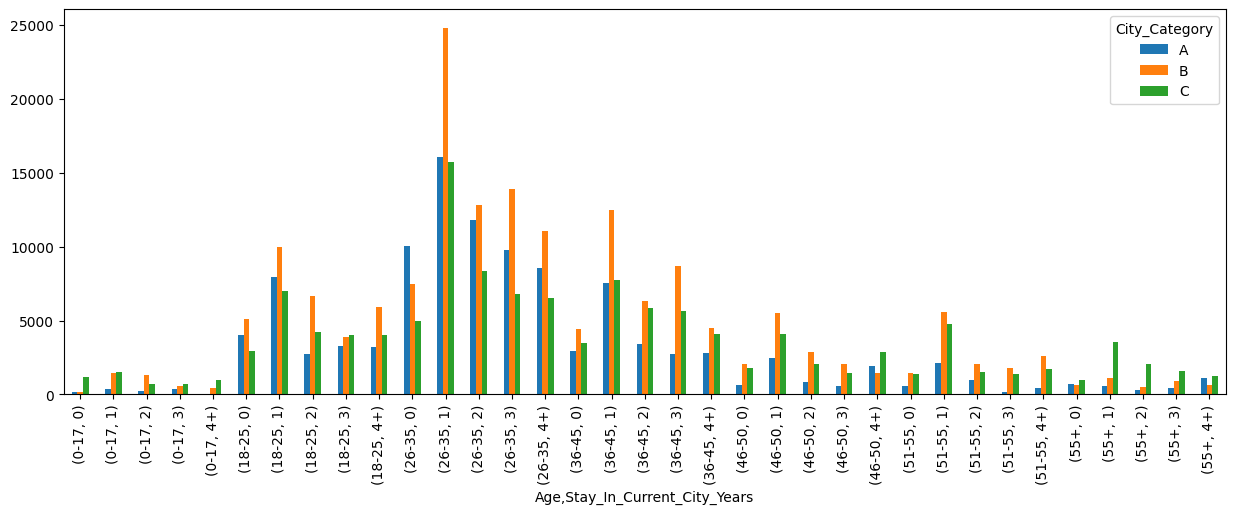

In [22]:
data_Stay_In_Current_City_Years.plot(kind='bar', figsize=(15, 5))

Most of the men aged 26-35 live in City B for only 1 year

In [23]:
data_Marital_Status = data_m.groupby(['Age', 'Marital_Status'])['Marital_Status'].count().unstack()
data_Marital_Status

Marital_Status,0,1
Age,,
0-17,10019.0,NaN
18-25,60187.0,14845.0
26-35,103218.0,65617.0
36-45,49728.0,33115.0
46-50,9524.0,22978.0
51-55,7259.0,21348.0
55+,5975.0,10446.0


<Axes: xlabel='Age'>

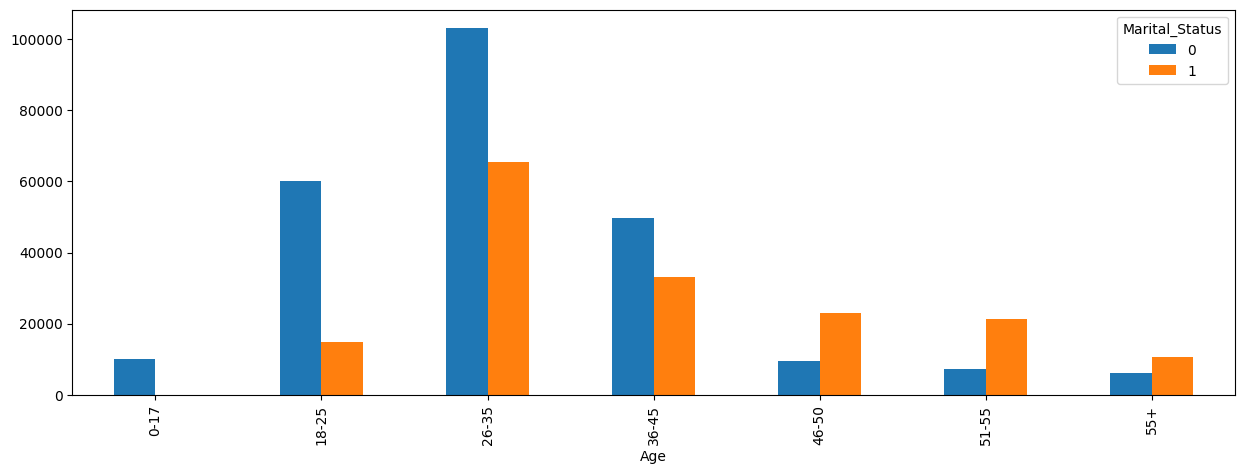

In [24]:
data_Marital_Status.plot(kind='bar', figsize=(15, 5))

Most of the men are not married

In [25]:
Product_Category = data_m.groupby('Age')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count().unstack()
Product_Category

                    Age  
Product_Category_1  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
Product_Category_2  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
Product_Category_3  0-17      10019
                    18-25     75032
                    26-35    168835
                    36-45     82843
                    46-50     32502
                    51-55     28607
                    55+       16421
dtype: int64

<Axes: xlabel='None,Age'>

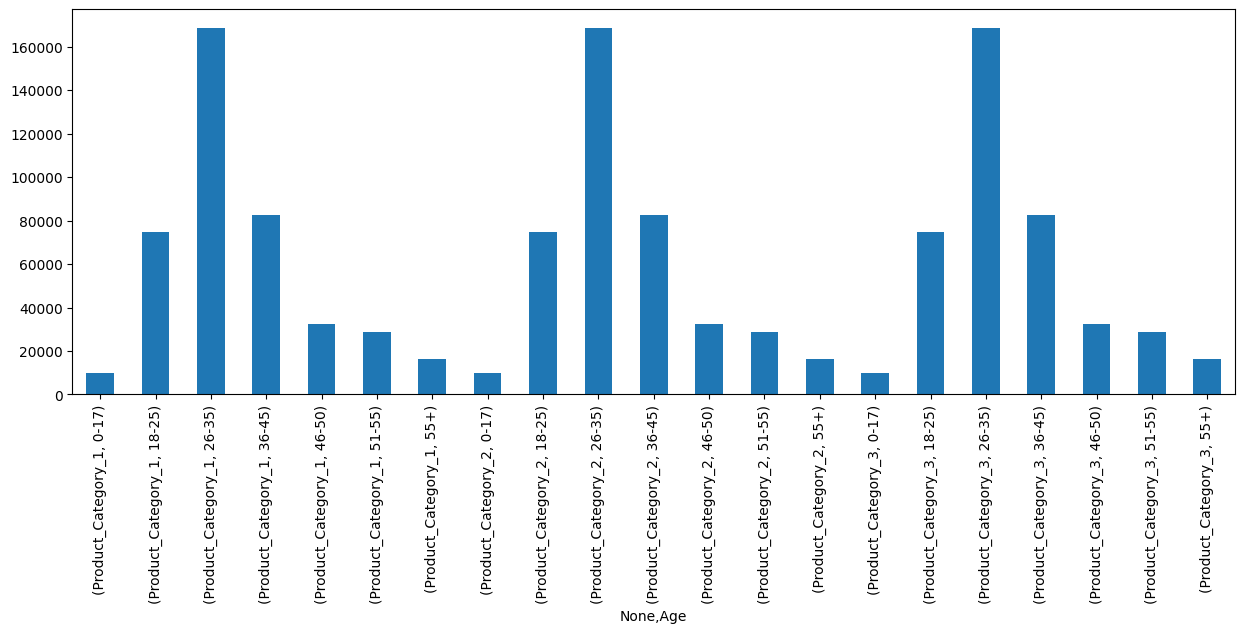

In [26]:
Product_Category.plot(kind='bar', figsize=(15,5))

Men from 26-35 buy the most goods of all three categories. Other age groups also buy all 3 categories of goods in the same volume

**Next, we will display the purchase amount. You may have already guessed which age group spent the most money**

In [27]:
data_Purchase = data_m.groupby('Age', as_index=False). \
    agg({'Purchase': 'sum'}). \
    sort_values('Age', ascending=True)
data_Purchase

,Age,Purchase
0,0-17,92527205
1,18-25,708372833
2,26-35,1588794345
3,36-45,783130921
4,46-50,304136539
5,51-55,277633647
6,55+,154984610


<Axes: xlabel='Age'>

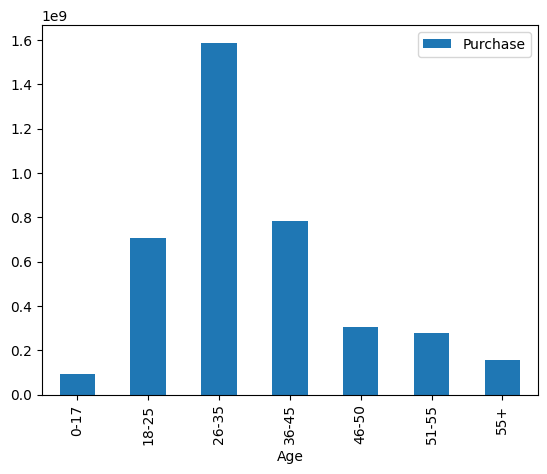

In [28]:
data_Purchase.plot(x = 'Age', y = 'Purchase', kind='bar')

Now let 's sort the data by age category 26-35 and see who makes purchases more often married men or bachelors ?

In [29]:
data_Marital_Status1 = data[(data['Marital_Status'] == 1) & (data['Age'] == '26-35')]
data_Marital_Status1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,9.842329,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.000000,9.842329,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,9.842329,9.842329,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,9.842329,9.842329,6073
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.000000,5.000000,15665
...,...,...,...,...,...,...,...,...,...,...,...,...
550045,1006005,P00371644,F,26-35,5,C,2,1,20,9.842329,9.842329,252
550057,1006023,P00370853,M,26-35,0,C,2,1,19,9.842329,9.842329,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,9.842329,9.842329,121
550061,1006029,P00372445,F,26-35,1,C,1,1,20,9.842329,9.842329,599


In [30]:
data_Marital_Status0 = data[(data['Marital_Status'] == 0) & (data['Age'] == '26-35')]
data_Marital_Status0

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,9.842329,15227
25,1000009,P00135742,M,26-35,17,C,0,0,6,8.000000,9.842329,16662
26,1000009,P00039942,M,26-35,17,C,0,0,8,9.842329,9.842329,5887
27,1000009,P00161442,M,26-35,17,C,0,0,5,14.000000,9.842329,6973
28,1000009,P00078742,M,26-35,17,C,0,0,5,8.000000,14.000000,5391
...,...,...,...,...,...,...,...,...,...,...,...,...
550051,1006013,P00375436,F,26-35,20,C,3,0,20,9.842329,9.842329,489
550055,1006019,P00372445,M,26-35,0,A,4+,0,20,9.842329,9.842329,238
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,9.842329,9.842329,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,9.842329,9.842329,48


In [31]:
data_Purchase_Marital_Status1 = data_Marital_Status1.groupby('Age')['Purchase'].sum()
data_Purchase_Marital_Status1

Age
26-35    798440476
Name: Purchase, dtype: int64

In [32]:
data_Purchase_Marital_Status0 = data_Marital_Status0.groupby('Age')['Purchase'].sum()
data_Purchase_Marital_Status0

Age
26-35    1233330102
Name: Purchase, dtype: int64

**Now we can safely say that the ABC Private Limited store on Black Friday can make money on single men, aged 26-35 from city B.**